In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import importlib
from pathlib import Path
import pandas as pd
import numpy as np
import joblib
from tqdm import tqdm
from joblib import Parallel, delayed
from itertools import product
from collections import defaultdict
import matplotlib.pyplot as plt

# 设定项目根目录
project_root = Path(os.getcwd()).parent
sys.path.append(str(project_root))

# 导入模型
from src.Bayesian_recon import *

In [2]:
import src.Bayesian_recon.problems.model as model
from src.Bayesian_recon.problems.model import StandardModel as Model

import src.Bayesian_recon.problems.config as config
from src.Bayesian_recon.problems.config import config_fgt

from src.Bayesian_recon.problems import *

from src.Bayesian_recon.utils.optimizer import Optimizer

#### cluster + forget mcmc

In [ ]:
def post_acc_amount_f(x):
    if x <= 0.2:
        return 0
    elif 0.2 < x < 0.3:
        return 1
    elif 0.3 <= x < 0.4:
        return 2
    elif 0.4 <= x < 0.5:
        return 3
    elif 0.5 <= x < 0.6:
        return 4
    elif 0.6 <= x < 0.7:
        return 5
    elif 0.7 <= x < 0.8:
        return 6
    elif 0.8 <= x <= 1:
        return 7

def random_acc_amount_f(x):
    return 7 - post_acc_amount_f(x)


module_config = {
    "cluster": (PartitionCluster, {
        "transition_spec":
        [("random_7", "random_posterior"),
         (3, "ksimilar_centers"),
         (PartitionCluster._amount_accuracy_gen(random_acc_amount_f,
                                                7), "random")]})
}
optimizer = Optimizer(module_config, n_jobs=120)

# 导入数据
processed_path = Path(project_root) / 'data' / 'processed'
optimizer.prepare_data(processed_path / 'Task2_processed.csv')

Error initializing module cluster: 'Optimizer' object has no attribute 'partition_model'


In [4]:
# 加载拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian_recon'
cluster_results = joblib.load(result_path / 'M_fgt_cl_random7_randp_k3.joblib')

best_params_list = [
    result['best_params'] for result in cluster_results.values()
]
gamma_values = [params['gamma'] for params in best_params_list]
w0_values = [params['w0'] for params in best_params_list]

In [25]:
res = optimizer.optimize_params_with_mcmc(
    config_fgt, gamma_values, w0_values, list(range(1, 25)), 5)

gamma_map: {1: 0.6, 2: 0.7, 3: 0.49999999999999994, 4: 0.95, 5: 0.5499999999999999, 6: 0.7999999999999999, 7: 0.05, 8: 0.25, 9: 1.0, 10: 0.15, 11: 0.65, 12: 0.7, 13: 0.2, 14: 0.2, 15: 0.7999999999999999, 16: 0.1, 17: 0.7, 18: 0.6, 19: 0.2, 20: 0.25, 21: 0.6, 22: 0.05, 23: 0.5499999999999999, 24: 0.95}
w0_map: {1: 0.15, 2: 0.013636363636363636, 3: 0.049999999999999996, 4: 0.0075, 5: 0.02142857142857143, 6: 0.012499999999999999, 7: 0.0375, 8: 0.0375, 9: 0.075, 10: 0.03, 11: 0.015, 12: 0.007894736842105263, 13: 0.03, 14: 0.010714285714285714, 15: 0.024999999999999998, 16: 0.02142857142857143, 17: 0.015, 18: 0.075, 19: 0.049999999999999996, 20: 0.0075, 21: 0.02142857142857143, 22: 0.012499999999999999, 23: 0.024999999999999998, 24: 0.012499999999999999}


[Parallel(n_jobs=120)]: Using backend LokyBackend with 120 concurrent workers.
/home/yangjiong/.conda/envs/bayes/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
MCMC tasks: 100%|████████████████████████████| 120/120 [00:00<00:00, 290.55it/s]
[Parallel(n_jobs=120)]: Done   6 out of 120 | elapsed:   23.3s remaining:  7.4min
[Parallel(n_jobs=120)]: Done  31 out of 120 | elapsed:  1.1min remaining:  3.2min
[Parallel(n_jobs=120)]: Done  56 out of 120 | elapsed:  2.0min remaining:  2.3min
[Parallel(n_jobs=120)]: Done  81 out of 120 | elapsed:  2.8min remaining:  1.4min
[Parallel(n_jobs=120)]: Done 106 out of 120 | elapsed:  3.6min remaining:   28.9s
[Parallel(n_jobs=120)]: Done 120 out of 120 | elapsed:  4.0min finished


In [26]:
# 保存拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian_recon'
os.makedirs(result_path, exist_ok=True)

joblib.dump(res, result_path / 'M_fgt_cluster_random4_mcmc.joblib')

['/home/yangjiong/CategoryLearning/results/Bayesian_recon/M_fgt_cluster_random4_mcmc.joblib']

In [9]:
# 加载拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian_recon'
cluster_results = joblib.load(result_path / 'M_fgt_cluster_random4_mcmc.joblib')

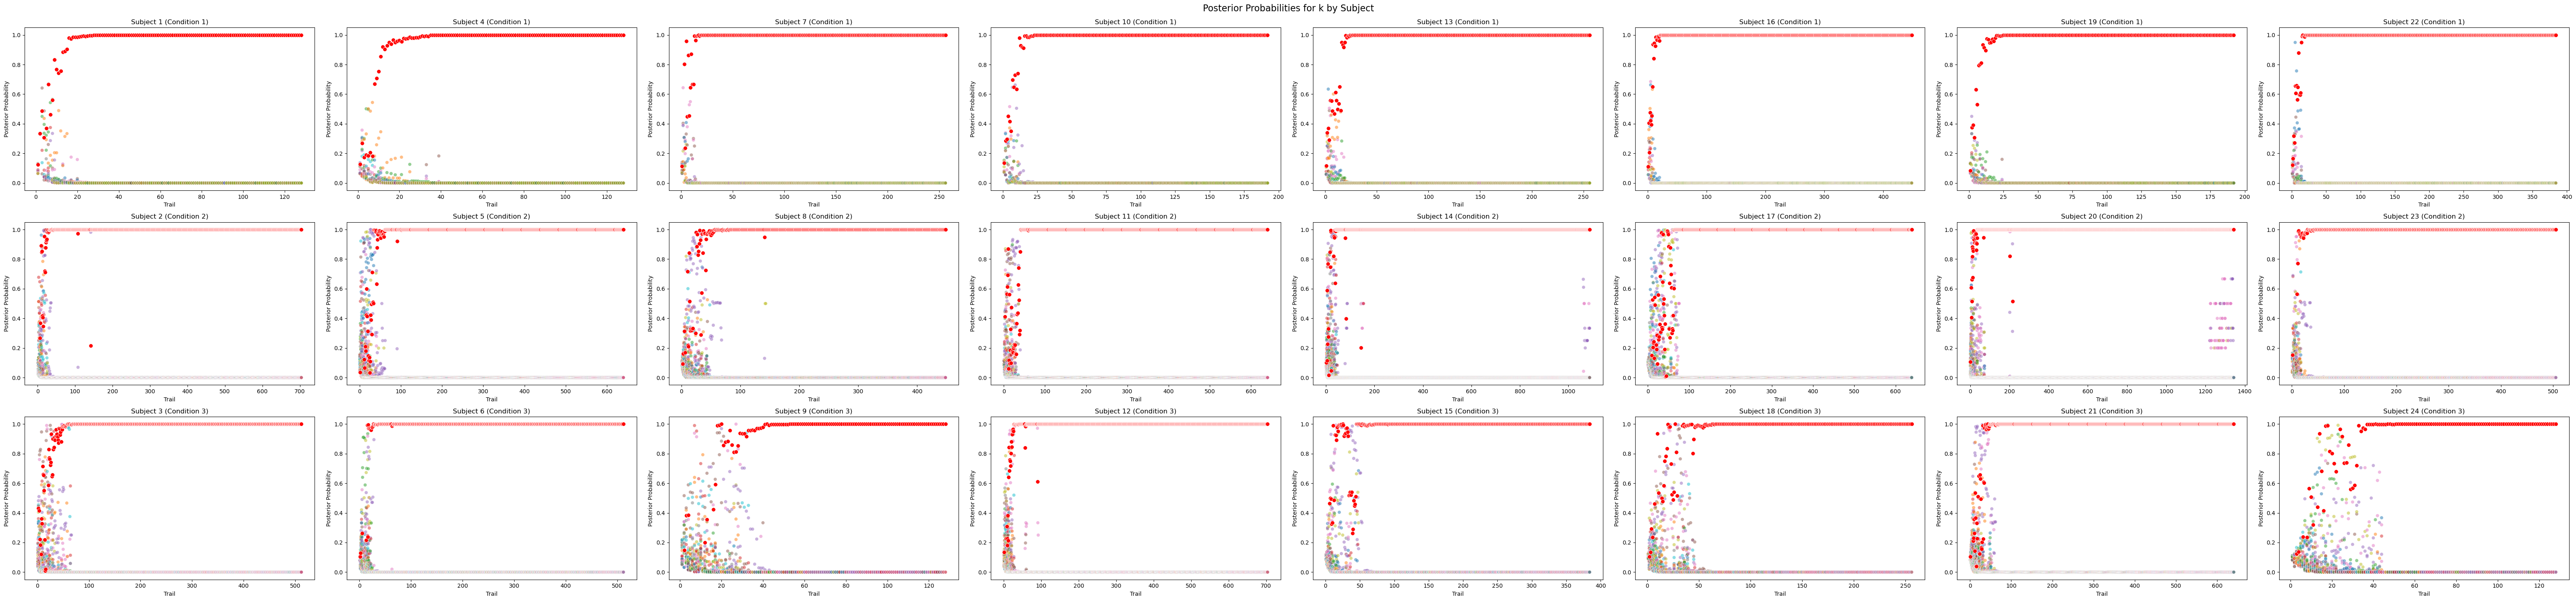

In [27]:
optimizer.plot_posterior_probabilities(
    res,
    list(range(1, 25)), save_path=result_path/'M_fgt_cluster_random4_mcmc_post.png')

In [ ]:
optimizer.set_results(cluster_results)
prediction = optimizer.predict_with_subs_parallel(
    config_fgt,
    range(1,25))

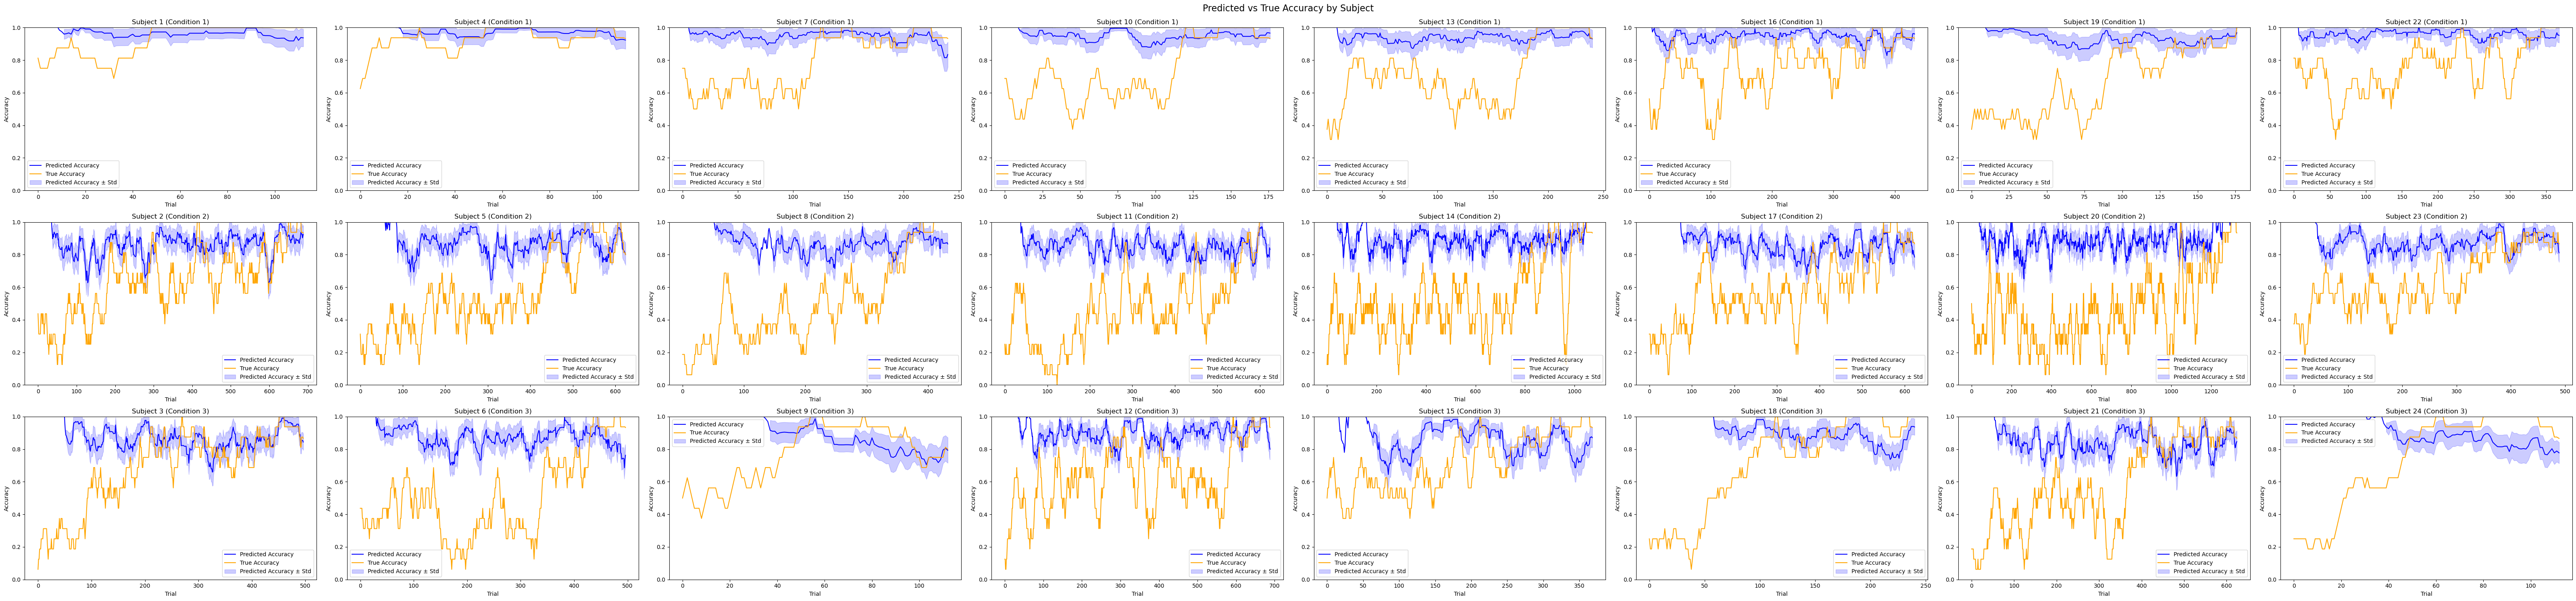

In [ ]:
optimizer.plot_accuracy_comparison(prediction, save_path=result_path/'M_fgt_cluster_random4_mcmc_acc.png')

#### cluster + forget fitting

In [ ]:
def post_acc_amount_f(x):
    if x <= 0.2:
        return 0
    elif 0.2 < x < 0.3:
        return 1
    elif 0.3 <= x < 0.4:
        return 2
    elif 0.4 <= x < 0.5:
        return 3
    elif 0.5 <= x < 0.6:
        return 4
    elif 0.6 <= x < 0.7:
        return 5
    elif 0.7 <= x < 0.8:
        return 6
    elif 0.8 <= x <= 1:
        return 7

def random_acc_amount_f(x):
    return 7 - post_acc_amount_f(x)


module_config = {
    "cluster": (PartitionCluster, {
        "transition_spec":
        [("random_7", "random_posterior"),
         (3, "ksimilar_centers"),
         (PartitionCluster._amount_accuracy_gen(random_acc_amount_f,
                                                7), "random")]})
    ,
    "memory": (BaseMemory, {
        "personal_memory_range": {
            "gamma": (0.05, 1.0),
            "w0": (0.075, 0.15)
        },
        "param_resolution": 20
    })
}
optimizer = Optimizer(module_config, n_jobs=120)

# 导入数据
processed_path = Path(project_root) / 'data' / 'processed'
optimizer.prepare_data(processed_path / 'Task2_processed.csv')

In [ ]:
res = optimizer.optimize_params_with_subs_parallel(
    config_fgt, [1])
    # list(range(1, 25)))

Processing tasks: 100%|█████████████████████████████████████████| 400/400 [1:56:10<00:00, 17.43s/it]


In [ ]:
# 保存拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian_recon'
os.makedirs(result_path, exist_ok=True)

joblib.dump(res, result_path / 'M_fgt_cluster_random4.joblib')

In [5]:
# 加载拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian_recon'
cluster_results = joblib.load(result_path / 'M_fgt_cl_acc7_randp_k3.joblib')

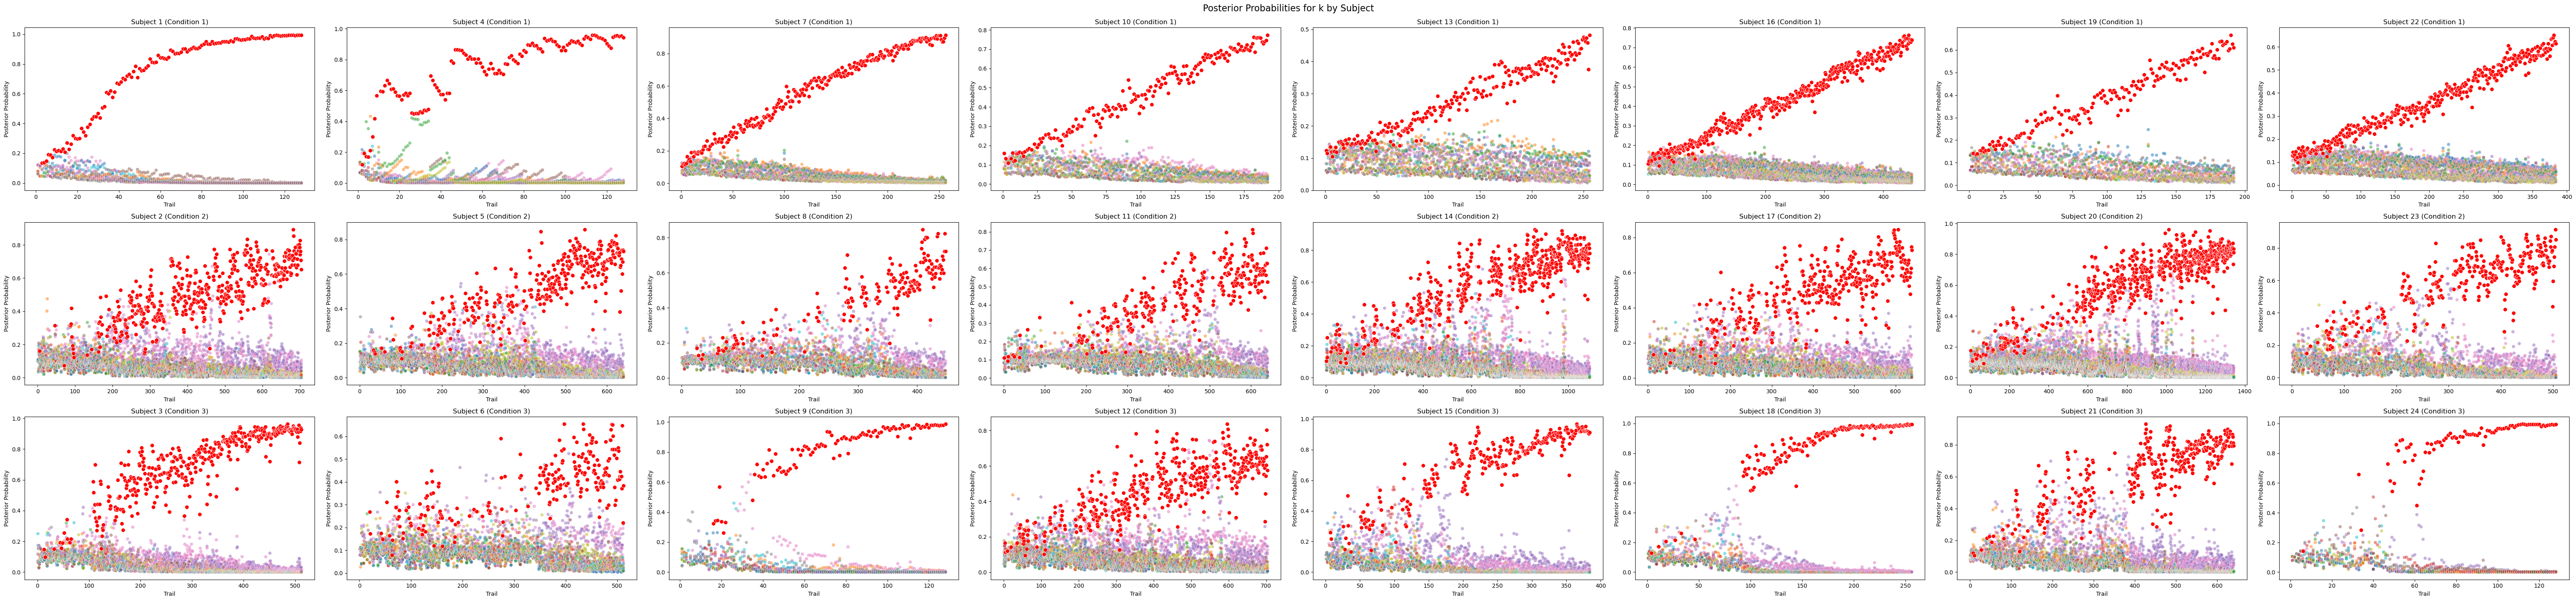

In [6]:
optimizer.plot_posterior_probabilities(
    cluster_results,
    range(1,25), save_path=result_path/'M_fgt_cl_acc7_randp_k3_post.png')

In [ ]:
optimizer.set_results(cluster_results)
prediction = optimizer.predict_with_subs_parallel(
    config_fgt,
    range(1,25))

In [ ]:
optimizer.plot_accuracy_comparison(prediction, save_path=result_path/'M_fgt_cluster_random4_mcmc_acc.png')

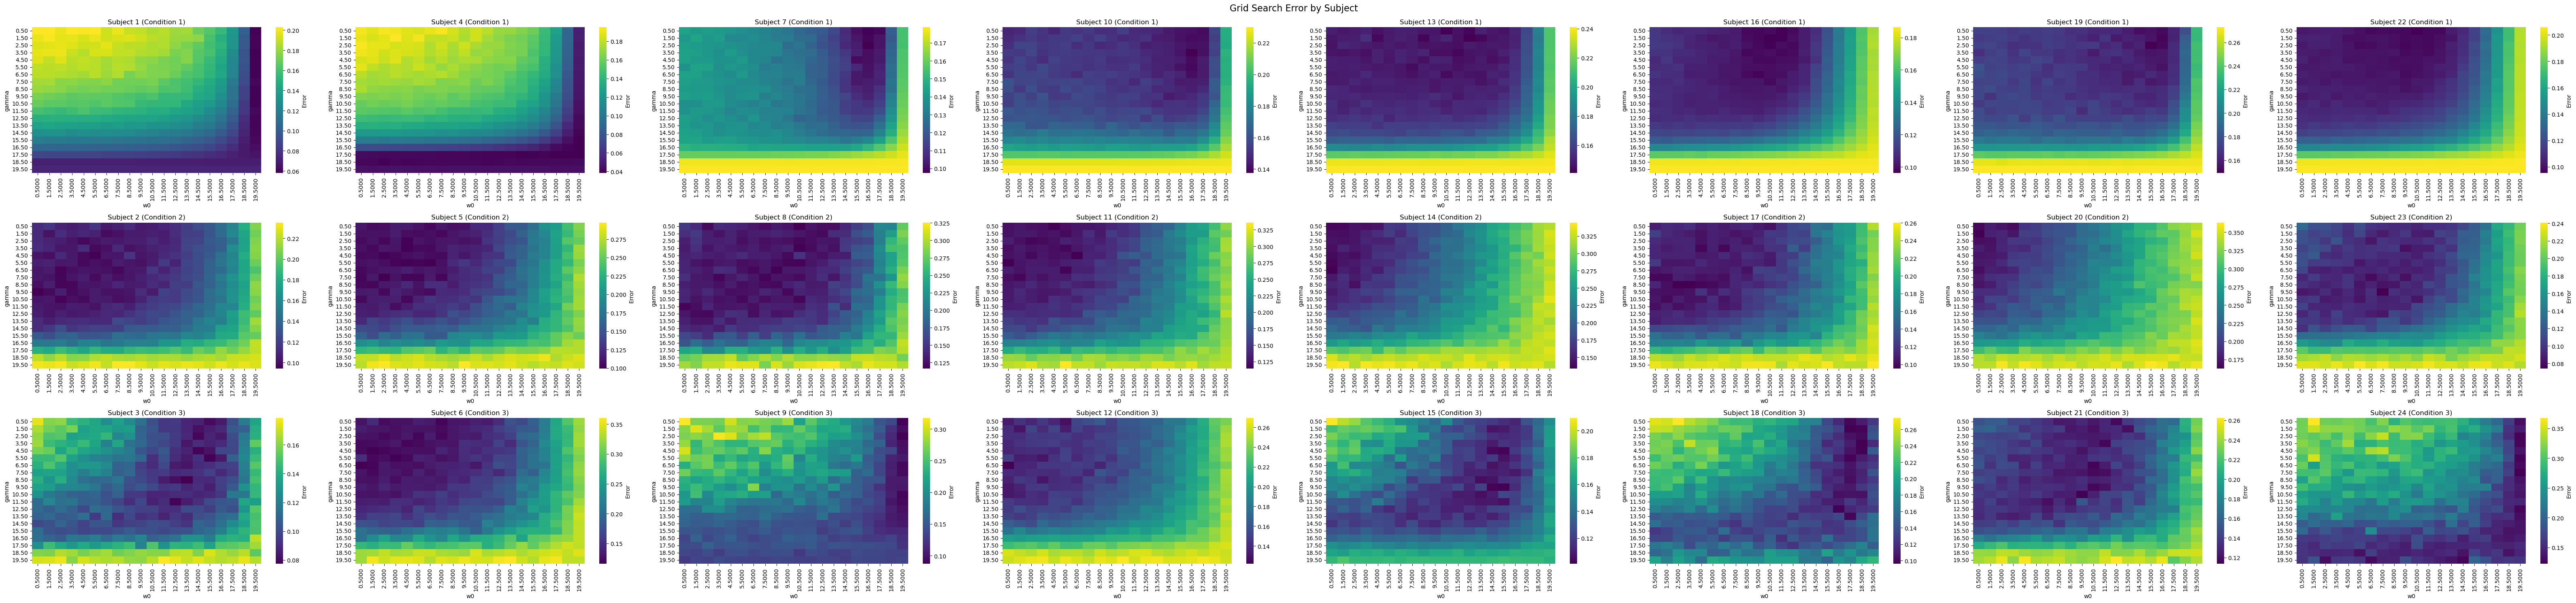

In [9]:
optimizer.plot_error_grids(cluster_results, save_path=result_path/'M_fgt_cl_acc7_randp_k3_grid.png')

####  q

In [ ]:
from pathlib import Path
import joblib

# 获取所有带有指定前缀的文件
files_to_merge = list(result_path.glob("M_fgt_cl_*.joblib"))

# 合并文件内容
merged_data = {}
for file in files_to_merge:
    data = joblib.load(file)
    merged_data.update(data)

# 保存合并后的文件
output_file = result_path / "M_fgt_cl.joblib"
joblib.dump(merged_data, output_file)

print(f"Merged file saved to {output_file}")